In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load Data File

In [6]:
# Step 1: Load the sample data
data = pd.read_csv('extended_data.csv')

In [5]:
print(data.head())

         Date  DayOfYear        Kc  ETo (mm/day)  Temp Min (°C)  \
0  2005-01-01          1  0.381885      4.410750       9.789106   
1  2005-01-02          2  0.372627      4.222018      10.665783   
2  2005-01-03          3  0.391786      4.850683       9.826846   
3  2005-01-04          4  0.412729      4.203843      11.058563   
4  2005-01-05          5  0.381018      4.246024      11.005993   

   Temp Max (°C)  Humidity (%)  Rainfall (mm)  Wind Speed (m/s)  \
0      27.353136     57.434054       5.111446          3.087441   
1      28.499545     59.809813       4.871262          3.113062   
2      27.045894     58.197544       4.236209          3.166388   
3      27.979741     57.406503       5.976850          3.235905   
4      28.735889     55.874160       5.319756          3.499658   

   Solar Radiation (MJ/m²)  ETc (mm/day)  
0                18.526496      1.819442  
1                16.859869      1.459451  
2                17.351438      1.615742  
3                17.17

## Data Prep


In [12]:
# Check for missing values
print(data.isnull().sum())

# Drop rows or fill missing values as needed
data = data.dropna()  # Drop rows with missing values
# Or alternatively, fill missing values
# data.fillna(method='ffill', inplace=True)

# Ensure numeric columns are correctly typed
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
# Ensure the 'Date' column is properly parsed as a datetime object (if present)
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])

Date                       0
DayOfYear                  0
Kc                         0
ETo (mm/day)               0
Temp Min (°C)              0
Temp Max (°C)              0
Humidity (%)               0
Rainfall (mm)              0
Wind Speed (m/s)           0
Solar Radiation (MJ/m²)    0
ETc (mm/day)               0
dtype: int64


## Correlation Matrix

In [13]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)


                             Date  DayOfYear        Kc  ETo (mm/day)  \
Date                     1.000000   0.062885 -0.052609     -0.048194   
DayOfYear                0.062885   1.000000 -0.771307     -0.771413   
Kc                      -0.052609  -0.771307  1.000000      0.979657   
ETo (mm/day)            -0.048194  -0.771413  0.979657      1.000000   
Temp Min (°C)           -0.047217  -0.770676  0.980336      0.980240   
Temp Max (°C)           -0.050138  -0.772003  0.980355      0.980396   
Humidity (%)            -0.050469  -0.772220  0.980910      0.980721   
Rainfall (mm)           -0.050325  -0.774152  0.980707      0.980764   
Wind Speed (m/s)        -0.043565  -0.772453  0.980945      0.980651   
Solar Radiation (MJ/m²) -0.049514  -0.772176  0.980573      0.979966   
ETc (mm/day)            -0.045616  -0.772983  0.980425      0.980048   

                         Temp Min (°C)  Temp Max (°C)  Humidity (%)  \
Date                         -0.047217      -0.050138     -0.050

## Viz correlation

In [16]:
!python3 -m pip install seaborn

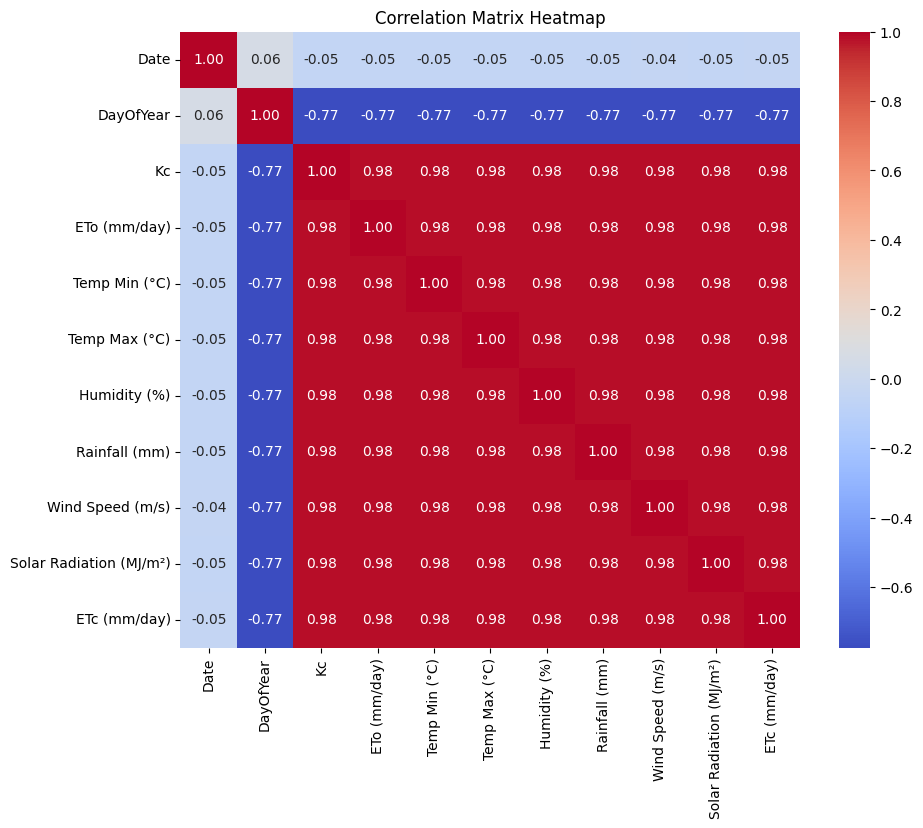

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add titles and labels
plt.title('Correlation Matrix Heatmap')
plt.show()
